# Machine Learning Coursework 

For the coursework, please make sure to implement your own code and not use libraries (except where explitly asked). You will need to present your own code that performs nested cross-validation and the k-nearest neighbour algorithm, build confusion matrices, and estimate distances between data samples.

The purpose of this coursework is to help you:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- don't use libraries that implement kNN or cross-validation.  We want to see your code!
- Remember to comment all of your code (see here for tips: https://stackabuse.com/commenting-python-code/). You can also make use of Jupyter Markdown, where appropriate, to improve the layout of your code and documentation.
- Please add docstrings to all of your functions (so that users can get information on inputs/outputs and what each function does by typing SHIFT+TAB over the function name. For more detail on python docstrings, see here: https://numpydoc.readthedocs.io/en/latest/format.html)
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Always save your notebook when you are done (this is not automatic)!

Plagiarism: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.



In [1]:
# From the Lecturers
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets # import datasets
import numpy as np # import numpy
import matplotlib.pyplot as plt # import plots
import pandas as pd

# set the seed for the random number generator
mySeed=1234567

# load data
iris = datasets.load_iris() # load data 
X = iris.data # get features
y = iris.target # get targets
print(iris.DESCR) # print dataset description


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## 1. Exploratory Data Analysis 

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at-hand. The code below loads the iris dataset for you. With only 4 features (sepal length, sepal width, petal length, and petal width), and 3 classes, it is possible to use scatter plots to visualise interactions between different pairings of features. An example of how this visualisation might look is shown below:

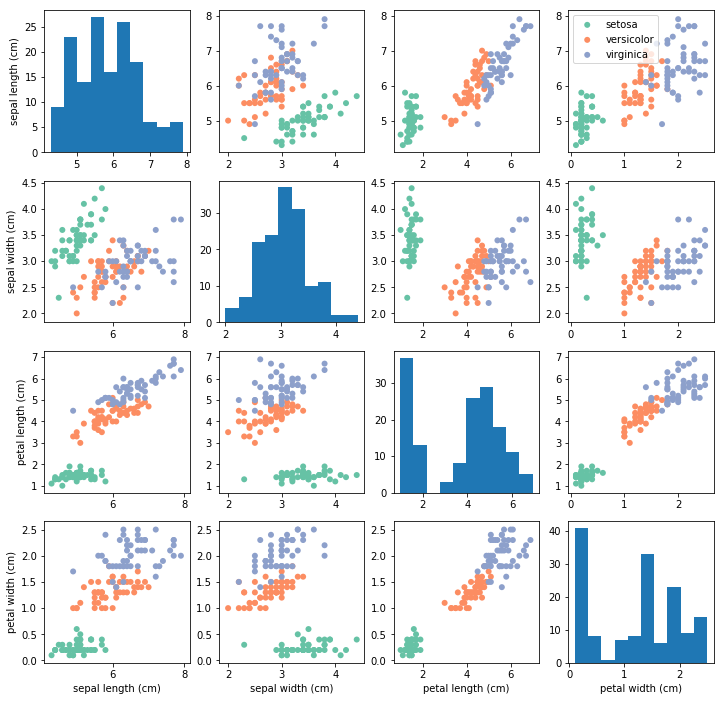

Your first task is to recreate this 4x4 grid, with each off-diagonal subplot showing the interaction between two features, with each of the three classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a histogram on that feature.     

You should create a function that, given data X and labels y, plots this 4x4 grid.  The function should be invoked as,
        
    myplotGrid(X,y)
    
where X is your training data and y are the labels. (There are libraries available that do this for us: e.g. pandas' pd.plotting.scatter_matrix, or seaborn, however here we want you to implement your own version).

In [2]:
feature_names = iris.feature_names #I start by taking the features names
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
classes=iris.target_names #I take as well the classes names
classes

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
#First I define a function which creates a DataFrame with the given data
def DFPrep(X,y,classes):
    '''
    This function creates a pandas DataFrame which contains the nominal classes.
    
    This function creates a pandas DataFrame given the X, y and the name of the classes.
    
    Parameters:
    X (float): array-like. The input data.
    y (int): array-like vector. The target data.
    classes (str): array-like vector. The target names.
    
    Returns:
    df : A pandas DataFrame which contains the input, the target as a numerical value and the target as nominal
    '''
    data=np.concatenate((X,y.reshape(150,1)), axis=1)#First, I concatenate the X and the y
    targetNominal=np.array([classes[val] for val in y])#I create an array with the nominal values
    data2=np.concatenate((data,targetNominal.reshape(150,1)), axis=1)#I concatenate it with the rest of the data
    #I create a pandas DataFrame
    df=pd.DataFrame(data2, columns=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','y','class'])
    return df

In [5]:
# define plotting function
def myplotGrid(X,y,feature_names,classes):
    ''' 
    This function creates an exploratory figure.
    The figure consists in scatter plots where each variable is plotted against another and on the diagonal,
    a histogram is shown for each variable.
    
    Parameters:
    X (float): Array-like. Input data
    y (int):Array-like. Target data
    feature_names (str) : list of feature names
    classes (str): array-like vector. The target names.
    
    Returns:
    Figure
    '''
    df=DFPrep(X,y,classes) #I put all the data into a pandas DataFrame
    #I change the type of the input data to be of type float
    df['sepal length (cm)']=df['sepal length (cm)'].astype(np.float)
    df['sepal width (cm)']=df['sepal width (cm)'].astype(np.float)
    df['petal length (cm)']=df['petal length (cm)'].astype(np.float)
    df['petal width (cm)']=df['petal width (cm)'].astype(np.float)
    #I create a dictionary to assign the color in the scatter plot
    colordict={'setosa': 'green', 'versicolor': 'orange', 'virginica':'blue'}
    #From here I design the plot
    f, axs= plt.subplots(len(feature_names),len(feature_names), figsize=(20,20))
    plt.suptitle('Exploratory Data Analysis', fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 16})
    #I iterate over the rows and the column of the grid to create the different plots. 
    #The number of rows and column of the grid is equal to the number of input variables
    for i in range(X.shape[1]):
        for j in range(X.shape[1]):
            #I create a histogram on the diagonal
            if i==j:
                axs[i,i].hist(X[:,i])
                axs[i,i].set_xlabel(feature_names[i])
                axs[i,i].set_ylabel('Instances')
            else:
                #On the other grid spaces, I create 2-variable scatter plots.
                #In order to label the classes I need to iterate over the classes and select at each iteration
                #one of the classes to scatter the data
                for val in classes:
                    data=df.loc[df['class']==val]
                    axs[j,i].scatter(data[feature_names[i]],data[feature_names[j]], c=colordict[val], label=val)
                    axs[j,i].set_xlabel(feature_names[i])
                    axs[j,i].set_ylabel(feature_names[j])
                    axs[j,i].legend(loc='best')       
    plt.show()

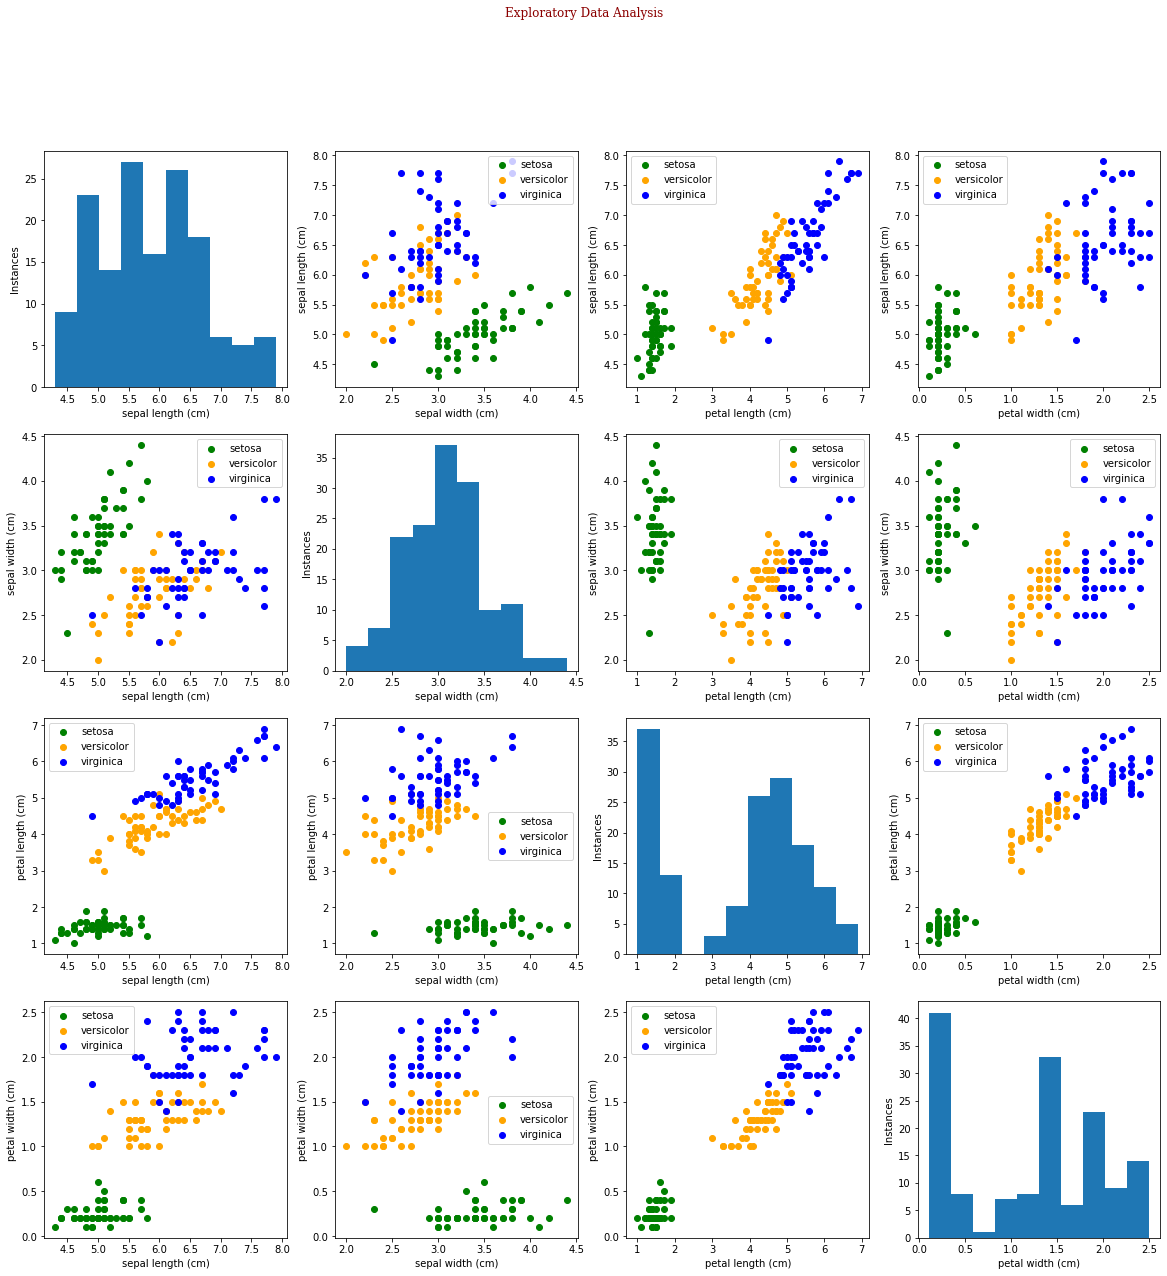

In [6]:
# run the plotting function
myplotGrid(X,y,feature_names,classes)

# From the Lecturers

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.5,X.shape)
    
and then invoke

    myplotGrid(XN,y)

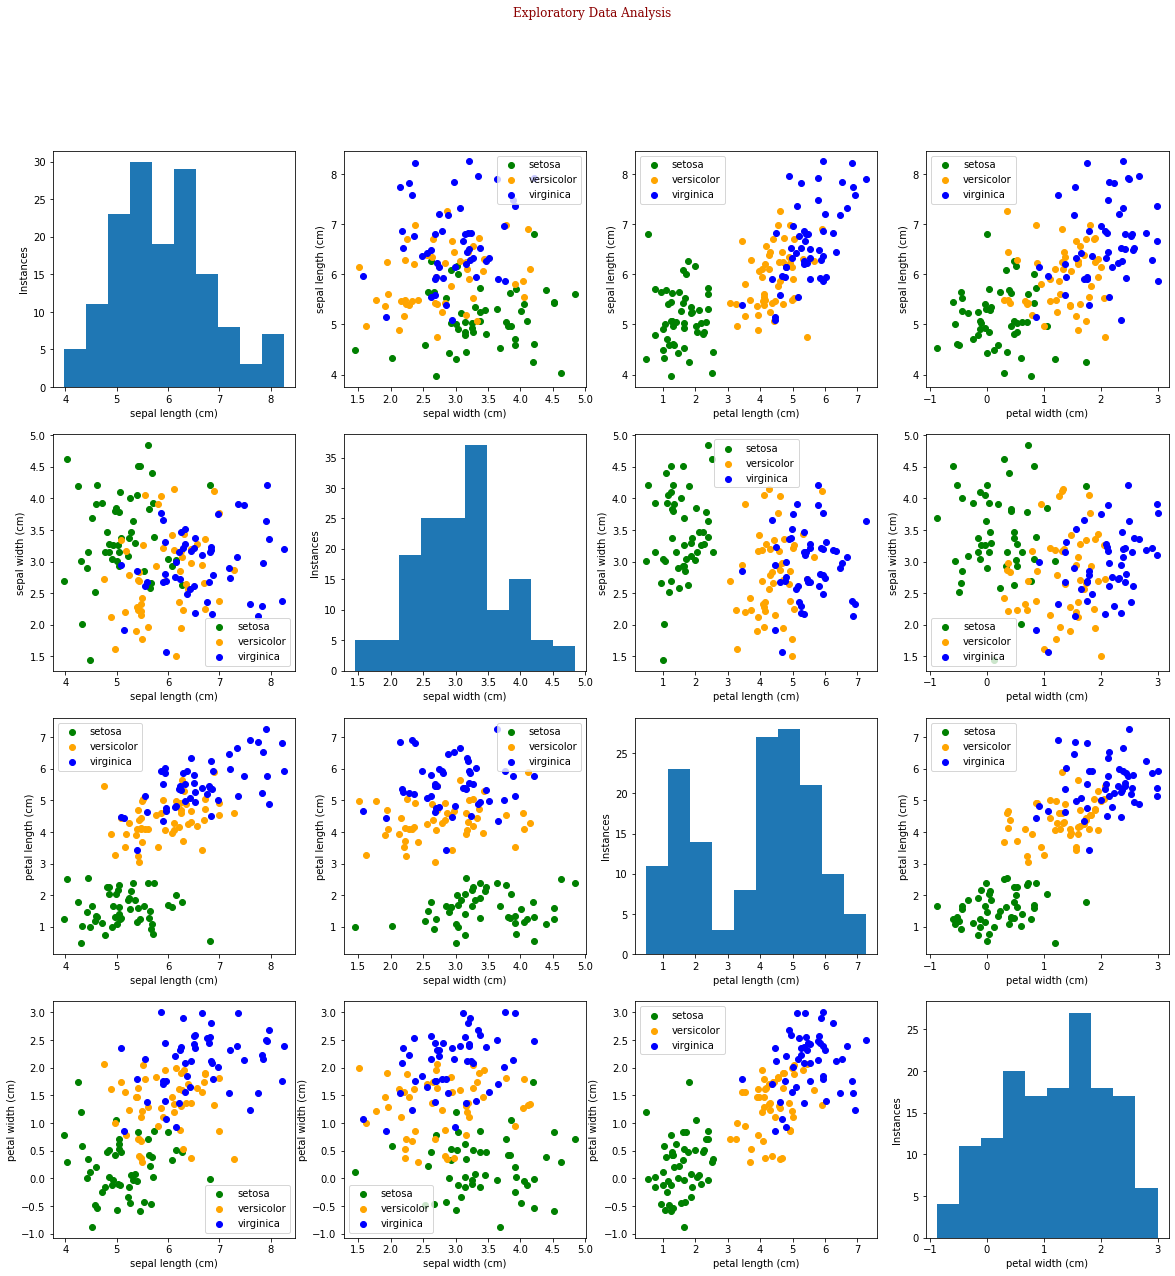

In [7]:
# noise code 
np.random.seed(mySeed) 
XN=X+np.random.normal(0,0.5,X.shape)
myplotGrid(XN,y,feature_names,classes)

# From the Lecturers

## 2. Implementing kNN

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying your results - but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions. 

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector. 


In [8]:
#To prepare the data to apply the model, I need to shuffle the data and split into test set and train sets
#First I put all the data together so I shuffle de Xs together with the ys
data=np.concatenate((X,y.reshape(150,1)), axis=1)
#Then I shuffle the data
np.random.seed(mySeed)
np.random.shuffle(data)
#I split the data where 20% of the whole data set is used for test (30 instances)
traindata=data[:120,:]
testdata=data[120:,:]
#I split back the data into Xs and y
X_train=traindata[:,:-1]
y_train=traindata[:,4]
X_test=testdata[:,:-1]
y_test=testdata[:,4]

Define a function that calculated the eucledean distance given by:
$$d=((x_{1}^{a}-x_{1}^{b})^{2}+(x_{2}^{a}-x_{2}^{b})^{2}+(x_{3}^{a}-x_{3}^{b})^{2}+(x_{4}^{a}-x_{4}^{b})^{2})^{1/2}$$
where 1 to 4 are the 4 input variables and a and b are the two points from which we are measurinig the distance.

In [9]:
def euclidean(a,b):
    '''
    This function calculates the euclidean distance given two points
    
    Parameters:
    a,b(float): Array-like vector. Two given points
    
    Returns:
    e (float): The distance between the two points which is a scalar
    '''
    c=a-b
    d=c**2
    e=(np.sum(d))**0.5
    return e

Define a function that calculates manhattan distance given by:
$$d=|x_{1}^{a}-x_{1}^{b}|+|x_{2}^{a}-x_{2}^{b}|+|x_{3}^{a}-x_{3}^{b}|+|x_{4}^{a}-x_{4}^{b}|$$
where 1 to 4 are the 4 input variables and a and b are the two points from which we are measurinig the distance.

In [10]:
def manhattan(a,b):
    '''
    This function calculates the manhattan distance given two points.
   
    Parameters:
    a,b(float): Array-like vector. Two given points
    
    Returns:
    e (float): The distance between the two points which is a scalar
    '''
    c=a-b
    d=np.abs(c)
    e=np.sum(d)
    return e

Define a function which finds the neighbors given the training data, a specific test point, the metric and the 'k' number of neighbors

In [11]:
def findNeighbors(trainingX,testpoint,k=5,metric='euclidean'):
    '''
    This function finds the 'k' closest neighbors to a test point.
    
    Given the training data, a specific test point,
    the distance metric and the 'k' number of neighbors, it finds the closest neighbors.
    
    Parameters:
    trainingX (float): Array-like. This is the training data set from which the function finds the closest neighbors
    testpoint (float): Array-like vector. This is the test point for which the function finds the closes neighbors.
    k(int):Scalar (Default=5). This is the number of neighbors to find.
    metric(str): (Default='euclidean'). This is the system metric to find the distance between two points, it can be
    either 'euclidean' or 'manhattan'
    
    Returns: 
    neighbors (int): array-like, a list of indices of the k nearest neighbors on the training data and the distance of each
    to the test point.
    '''
    #First I create empty lists where I am going to store the values
    index=[]
    distance=[]
    #I iterate over the training data and I measure the distance between the test point and each point in the training data.
    #I use the distance function according to the user's choice
    for i in range(trainingX.shape[0]):      
        if metric=='manhattan':
            d=manhattan(trainingX[i],testpoint)
        elif metric=='euclidean':
            d=euclidean(trainingX[i],testpoint)
        #I append each distance and the index of the point in two different lists
        index.append(int(i))
        distance.append(d)
    #I create a pandas DataFrame with the training point indices and the distances from the test point.
    toSort=pd.DataFrame(columns=['index','distance'])
    toSort['index']=index
    toSort['distance']=distance
    #This way I could sort the distance values from the shortest to the largest and saving the indices of the training data
    #in the same order
    sortedDist=toSort.sort_values('distance',ascending=True)
    #According to the given k, I slice the initial part of the DataFrame, and I take it into a Numpy array 
    neighbors=sortedDist.iloc[:k,:].values
    return neighbors

mykNN function uses the previous function to find the neighbors, from this, it can look into the y values of the neighbors and find the more frequent category among the neighbors to allocate to the predicted value, if there is an equal number of neighbors of two different categories which are the two most frequent, the selected category will be the one that the neighbors are closest to the test point. 

In [12]:
def mykNN(X,y,X_,k=5,metric='euclidean'):
    '''
    This function predicts the categories of a test set of points by k nearest neigbors.
    
    It receives the input variables of a test set, the inputs and targets of a training set,
    a "k" number of neighbors and a metric system to measure the distance between two points.
    It finds the k closest nearest neighbors for each point and assigns the most frequent category,
    or in the case that two or more categories are the most frequent, the value is assigned considering the closest.
    
    Parameters:
    X(float): array-like training input data
    y(int): array-like training target data
    X_(float): array-like test input data
    k (int): (Default=5) scalar k neighbors to find and which help assign the categorical value.
    metric (str): (Default='euclidean') This is the system metric to find the distance between two points, it can be
    either 'euclidean' or 'manhattan'.
    
    Returns:
    y_pred: array-like vector, predicted target values for the test input data.
    '''
    #First I create an empty list of the prediction values
    y_pred=[]
    #I iterate over the X_test
    for i in range(X_.shape[0]):
        #I find the indices and distances of the closest neighbors using the "findNeighbors" function given the k, the training
        #data and the selected distance measurement by the user
        neighbors=findNeighbors(X,X_[i],k,metric)
        #I use the given indices to create a list of the knn classes
        neighborclasses=[y[int(neighbors[j][0])] for j in range(k)]
        # At the same time I create a list with the distance of each neighbor to the test point which is the second column of
        #the array returned when I called the function neighbors
        neighborDist=neighbors[:,1]
        #I create an empty array on which I will populate for each class(row) the amount of times it appears in the 
        #neighborclasses list in the first column. In the second column, I sum the distances of the neigbors to the point,
        #this way, I could check which classes had the closest neighbors in case 
        #the number of neighbors for each class is equal.
        sumclasses=np.zeros((3,2))
        for n in range(k):
            if neighborclasses[n]==0:
                sumclasses[0][0]+=1
                sumclasses[0][1]+=neighborDist[n]
            elif neighborclasses[n]==1:
                sumclasses[1][0]+=1
                sumclasses[1][1]+=neighborDist[n]
            else:
                sumclasses[2][0]+=1
                sumclasses[2][1]+=neighborDist[n]
        #Once the array is populated, I look for the most frequent class to be allocated to the test point
        if sumclasses[0,0]>sumclasses[1,0] and sumclasses[0,0]>sumclasses[2,0]:
            y_=0
        elif sumclasses[1,0]>sumclasses[0,0] and sumclasses[1,0]>sumclasses[2,0]:
            y_=1
        elif sumclasses[2,0]>sumclasses[0,0] and sumclasses[2,0]>sumclasses[1,0]:
            y_=2
        #In case the counts were equal for the two most frequent classes, then it looks for the closest category, using 
        #the values in the second column
        elif sumclasses[0,0]==sumclasses[1,0] and sumclasses[0,0]>sumclasses[2,0]:
            if sumclasses[0,1]<sumclasses[1,1]:
                y_=0
            else:
                y_=1
        elif sumclasses[0,0]==sumclasses[2,0] and sumclasses[0,0]>sumclasses[1,0]:
            if sumclasses[0,1]<sumclasses[2,1]:
                y_=0
            else:
                y_=2
        elif sumclasses[1,0]==sumclasses[2,0] and sumclasses[1,0]>sumclasses[0,0]:
            if sumclasses[1,1]<sumclasses[2,1]:
                y_=1
            else:
                y_=2
        #similarly if the number of neighbours is equal for the three categories, it looks for the closest category
        #this will be unlikely in the given data looking at the exploratory graphs
        elif sumclasses[0,0]==sumclasses[1,0]==sumclasses[2,0]:
            if sumclasses[0,1]<sumclasses[1,1] and sumclasses[0,1]<sumclasses[2,1]:
                y_=0
            elif sumclasses[1,1]<sumclasses[0,1] and sumclasses[1,1]<sumclasses[2,1]:
                y_=1
            elif sumclasses[2,1]<sumclasses[0,1] and sumclasses[2,1]<sumclasses[1,1]:
                y_=2
        #each value is appended to the prediction values list which is later given as the result
        y_pred.append(y_)
    return y_pred    

In [13]:
y_pred=mykNN(X_train,y_train,X_test,10,'euclidean')

# From the Lecturers

## 3. Evaluation

In the cell below, implement your own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy. 

Write some additional code that lets you display the output of your confusion matrices in a useful and easy-to-read manner.

You might want to test your functions on some test data, and compare the results to the sklearn library versions. 


In [14]:
# confusion matrix code
def myConfMat(y_test,y_pred,noOfclasses):
    '''
    This function creates a confusion matrix.
    
    This function creates a function matrix where it shows which values were correctly classified 
    and which ones were incorrectly classified.
    
    Parameters:
    y_test(int): array-like- vector. The test target data.
    y_pred(int): array-like- vector. The predicted values obtained by mykNN from the training data and test input data.
    noOfclasses (int) : scalar. The ammount of different classes in the test data.
    
    Returns:
    C(int): array-like: The confusion matrix
    '''
    C=np.zeros((noOfclasses, noOfclasses))
    for i in range(noOfclasses):
        for j in range(noOfclasses):
            for a in range(len(y_test)):
                if y_test[a]==i and y_test[a]== j and y_test[a]==y_pred[a]:
                    C[i][j] +=1
                elif y_test[a] == i and y_test[a]!=y_pred[a] and y_pred[a]==j:
                    C[i][j] +=1
    return C

def totalAccuracy(y_test,y_pred):
    '''
    This function calculates the total accuracy of the model.
    The accuracy is calculated by dividing the amount of correctly classified points by the total number of points.
    
    Parameters:
    y_test(int): array-like- vector. The test target data.
    y_pred(int): array-like- vector. The predicted values obtained by mykNN from the trainin data and test input data.
    
    Returns:
    accuracy(float): scalar. The total accuracy of the model. 
    '''
    correct=0
    for i in range(len(y_test)):
        if y_test[i]==y_pred[i]:
            correct+=1
    accuracy=correct/len(y_test)*100
    return accuracy

def classAccuracy(y_test,y_pred,ClassNo):
    '''
    This function calculates the accuracy of a specific class in the model.
    
    The accuracy per class is calculated by dividing the number of total of the correctly classified point on this class
    by the total number of points of this class in the test set.
    
    Parameters:
    y_test(int): array-like- vector. The test target data.
    y_pred(int): array-like- vector. The predicted values obtained by mykNN from the trainin data and test input data.
    ClassNo(int): The number of the class of interest.
    
    Returns:
    classAcc(float): scalar. The total accuracy of the model for a particular class.
    '''
    correct=0
    totalclass=0
    for i in range(len(y_test)):
        if y_test[i]==ClassNo:
            totalclass+=1
            if y_test[i]==y_pred[i]:
                correct+=1
    classAcc=correct/totalclass*100
    return classAcc
    
print('Total accuracy: '+str(round(totalAccuracy(y_test,y_pred),2)))
print('Class 0 accuracy: '+str(round(classAccuracy(y_test,y_pred,0),2)))
print('Class 1 accuracy: '+str(round(classAccuracy(y_test,y_pred,1),2)))
print('Class 2 accuracy: '+str(round(classAccuracy(y_test,y_pred,2),2)))

Total accuracy: 96.67
Class 0 accuracy: 100.0
Class 1 accuracy: 85.71
Class 2 accuracy: 100.0


In [15]:
matrix=myConfMat(y_test,y_pred,len(np.unique(y)))
matrixdf=pd.DataFrame(matrix, columns=['Pred Class 0','Pred Class 1','Pred Class 2'], 
                      index=['RT Class 0', 'RT Class 1', 'RT Class 2'])
print('Confusion Matrix:')
matrixdf

Confusion Matrix:


,Pred Class 0,Pred Class 1,Pred Class 2
RT Class 0,11.0,0.0,0.0
RT Class 1,0.0,6.0,1.0
RT Class 2,0.0,0.0,12.0



## 4. Nested Cross-validation using your implementation of KNN 

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan',...]`` evaluates the distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on both your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should implement/validate **at least** two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


First, I create a function which will be useful to split the data in each fold differently into training and test Xs and ys. This function will be used twice, First to split the data into training and test, then into training and validation.

In [16]:
def splitIterateData(b, folds, Data):
    '''
    This function splits the data into training input, training target, test input and test target for each iteration
    within a loop for cross-validation or nested cross-validation.
    
    For each b in the loop, which iterates over range(folds), a different part of the data is defined as the test set and the 
    rest, the training set. At the end the function will divide the data into inputs and targets, returning 4 arrays.
    
    Parameters: 
    b (int): scalar. A value which will change in the loop from 0 to (folds-1).
    folds (int): Scalar. The number of folds to do the cross-validation.
    Data(float): array-like. All the data which will be separated into the training set-test set, inputs and targets.
    
    Returns:
    X_train (float): array-like. The training input data
    y_train (int): array-like vector. The training target data 
    X_test (float): array-like. The test input data.
    y_test (int): array-like vector. The test target data
    '''
    c=b+1 #b is the value that iterates in the loop and c is an additional parameter which value is 1 more than b.
    #B and C are numbers which help divide the data into folds, they are obtained by multiplying
    #b and c by the number of data points and dividing by the number of folds.
    #for example in the second loop for the iris data with 5 folds, b=1,c=2, B=30, C=60
    C=int(c*(Data.shape[0]/folds))
    B=int(b*(Data.shape[0]/folds))
    #when b equal 0 and b equals folds-1, the data is straight divided by two into test and train.
    if b==0:
        testData=Data[:C]
        trainData=Data[C:]
    elif b==(folds-1):
        trainData=Data[:B]
        testData=Data[B:]
    #but in other cases, the test set is in the middle of the data and the two parts of the training data need
    #to be concatenated
    else:
        train1=Data[:B]
        testData=Data[B:C]
        train2=Data[C:]
        trainData=np.concatenate((train1,train2))
    #At the end, the function splits the data into Xs and ys
    X_train=trainData[:,:-1]
    y_train=trainData[:,4]
    X_test=testData[:,:-1]
    y_test=testData[:,4]
    return X_train, y_train, X_test, y_test

In order to find the best hyperparameters, I need to look over the best hyperparameters in each inner fold in the validation and find the most frequent value, both for the k and the distance, hence I create this function.

In [17]:
def findMostFreq(listofvalues):
    '''
    This function finds the most frequent value in a list. In case there are two most frequent values, the function returns
    the first in the list. In case there isn't a value in the list which repeats at least once, the function returns the first
    value of the list.
    
    Parameters:
    listofvalues (list): The list can contain either numbers or strings.
    
    Returns:
    mostfreq: it can be either a string or a scalar.
    '''
    counts={} 
    for val in listofvalues: # It iterates over the values in the list.
        if val in counts: #It adds 1 every time that the value appears in the list
            counts[val]+=1
        else:
            counts[val]=1 #when it is the first time that it appears it starts from one.
    bestcounts=1
    for val in listofvalues: #It iterates again over the list of values
        if counts[val]>bestcounts: #It checks whether the counts for each value is higher than bestcounts which starts from 1
            #When a specific value is the most frequent, the bestcounts take the number of counts
            #from the dictionary of this specific value and the mostfreq now is this specific value.
            bestcounts= counts[val]
            mostfreq=val
    if bestcounts==1:#In case all the values are different and bestcounts remains 1, this can only happen for k
        #I calculate the mean of the list of ks
        mean=np.mean(listofvalues)
        mostfreq=mean#I use the mean as the most frequent value.
    return mostfreq

Here I definded the function myNestedCrossVal

In [18]:

# myNestedCrossVal code
def myNestedCrossVal(X,y,folds=5,klist=list(range(1,11)),metrics=['euclidean','manhattan'],seed=mySeed):
    '''
    This function performs a nested cross-validation for k-Nearest Neighbors.
    
    Given the initial data, the number of folds, the list of Ks, a list of metric systems and a seed number, the function 
    performs a nested cross-validation with kNN and returns a list of accuracies and prints at each fold the best k,
    the best distance, the accuracy and the confusion matrix.
    
    Parameters:
    X (float): Array-like. Input data
    y (int):Array-like. Target data
    folds(int): number of folds to perform the nested cross-validation.
    klist (int):(Default=list(range(1,11))) List of k neighbors to find and assign the categorical value.
    metrics (str): (Default=['euclidean','manhattan']) List of the metricsystem to find the distance between two points.
    seed (int): The seed number is a value which helps get every time the same data when using a function that randomises.
    
    Returns:
    Accuracies(float): List- A list of the accuracies for each fold.
    '''
    #First, it concatenates the X and y into a single array "Data"
    Data=np.concatenate((X,y.reshape(150,1)), axis=1)
    np.random.seed(seed) 
    np.random.shuffle(Data) #It shuffles the data
    Accuracies=list() #It creates an empty list for accuracies
    for b in range(folds): #It iterates over the number of folds
        #For each fold it creates different training and tests Xs and ys 
        X_train, y_train, X_test, y_test=splitIterateData(b, folds, Data)
        #Now it concatenates the X_train and y_train which will be used as a single dataset for training and validation.
        Trainvaldata=np.concatenate((X_train,y_train.reshape(-1,1)),axis=1)
        Ksval=[] #It Creates an empty list of ks which will receive the values of the best k at each inner loop
        Distvals=[] #It Creates an empty list of the distances which will receive the values of the best distance at each inner
                    #loop
        for b in range(folds): #It iterates over the same number of folds
            #It divides the initial training data into training and validation Xs and ys
            X_train_small, y_train_small, X_val, y_val=splitIterateData(b, folds, Trainvaldata)    
            best_accuracy=0 #I create a value where I will store the best accuracy, it starts from 0.
            for k in klist: #It iterates over the list of ks 
                for dist in metrics: #It iterates over the list of metrics
                    #It performs the kNN model within the training small data and the input validation data for each k
                    #and each distance
                    y_pred_val=mykNN(X_train_small,y_train_small,X_val,k,metric=dist)
                    #It calculates the accuracy of the model given the predicted validation values and the validation targets
                    acc=totalAccuracy(y_val,y_pred_val)
                    if acc>= best_accuracy: 
                        #When the accuracy is equal or bigger than the best accuracy, it changes the value of the best accuracy
                        #with the accuracy of the model, it stores the k and the distances as the bestk and best_dist
                        best_accuracy=acc
                        best_k=k
                        best_dist=dist
            #At each inner fold the best ks and distances are appended to these lists.
            Ksval.append(best_k)
            Distvals.append(best_dist)
        #When it finishes iterating over the inner folds and finds the best ks and distances which are stored in the lists,
        #it uses the function findmostFreq to find the most frequent ks and distances which are the best hyperparameters 
        #for this fold
        bestK=findMostFreq(Ksval)
        bestDist=findMostFreq(Distvals)
        print("The best K is: "+str(bestK)) #It prints the best hyperparameters for this fold
        print("The best distance metric is: "+bestDist)
        y_pred=mykNN(X_train,y_train,X_test,k=bestK, metric=bestDist) #Then it performs again the kNN using all the training
        #and test data and using the best hyperparameters in this fold
        accuracy=totalAccuracy(y_test,y_pred) #It calculates the accuracy of the KNN of this fold
        Accuracies.append(accuracy) #It appends the accuracy in the list 
        print("The accuracy in this fold is:"+str(round(accuracy,2))) #Then it prints the accuracy
        print(myConfMat(y_test,y_pred,len(np.unique(y)))) #It creates and prints the confusion matrix for this fold.
    return Accuracies
    

In [19]:
# evaluate clean data code
Accuracies=myNestedCrossVal(X,y,folds=5,klist=list(range(1,11)),metrics=['euclidean','manhattan'],seed=mySeed)

The best K is: 10
The best distance metric is: manhattan
The accuracy in this fold is:96.67
[[11.  0.  0.]
 [ 0. 10.  1.]
 [ 0.  0.  8.]]
The best K is: 10
The best distance metric is: manhattan
The accuracy in this fold is:90.0
[[12.  0.  0.]
 [ 0. 10.  1.]
 [ 0.  2.  5.]]
The best K is: 10
The best distance metric is: manhattan
The accuracy in this fold is:96.67
[[ 5.  0.  0.]
 [ 0. 13.  1.]
 [ 0.  0. 11.]]
The best K is: 10
The best distance metric is: euclidean
The accuracy in this fold is:100.0
[[11.  0.  0.]
 [ 0.  7.  0.]
 [ 0.  0. 12.]]
The best K is: 10
The best distance metric is: manhattan
The accuracy in this fold is:96.67
[[11.  0.  0.]
 [ 0.  6.  1.]
 [ 0.  0. 12.]]


In [20]:
print('Mean Accuracy: '+ str(round(np.mean(Accuracies),2)))
print('Std. Dev. Accuracy: '+str(round(np.std(Accuracies),2)))

Mean Accuracy: 96.0
Std. Dev. Accuracy: 3.27


In [21]:
# evaluate noisy  data code
NoisyDataAccuracies=myNestedCrossVal(XN,y,folds=5,klist=list(range(1,11)),metrics=['euclidean','manhattan'],seed=mySeed)

The best K is: 10
The best distance metric is: manhattan
The accuracy in this fold is:83.33
[[11.  0.  0.]
 [ 0.  9.  2.]
 [ 0.  3.  5.]]
The best K is: 10
The best distance metric is: euclidean
The accuracy in this fold is:83.33
[[12.  0.  0.]
 [ 0.  9.  2.]
 [ 0.  3.  4.]]
The best K is: 10
The best distance metric is: euclidean
The accuracy in this fold is:83.33
[[ 5.  0.  0.]
 [ 0. 11.  3.]
 [ 0.  2.  9.]]
The best K is: 9
The best distance metric is: euclidean
The accuracy in this fold is:93.33
[[11.  0.  0.]
 [ 0.  6.  1.]
 [ 0.  1. 11.]]
The best K is: 8
The best distance metric is: manhattan
The accuracy in this fold is:86.67
[[11.  0.  0.]
 [ 0.  7.  0.]
 [ 0.  4.  8.]]


In [22]:
print('Mean Accuracy: '+ str(round(np.mean(NoisyDataAccuracies),2)))
print('Std. Dev. Accuracy: '+str(round(np.std(NoisyDataAccuracies),2)))

Mean Accuracy: 86.0
Std. Dev. Accuracy: 3.89


## 5. Summary of results 

Using your results from above, fill out the following table using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 96.67  |  10 | manhattan  |
| 2 | 90.00  |  10 | manhattan  |
| 3 | 96.67  |  10 | manhattan  |
| 4 | 100.0  |  10 | euclidean  |
| 5 | 96.67  |  10 | manhattan  |
| **total** | 96.00 $\pm$ 3.27 |   |    |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 83.33  |  10 | manhattan  |
| 2 | 83.33  |  10 | euclidean  |
| 3 | 83.33  |  10 | euclidean  |
| 4 | 93.33  |  9  | euclidean  |
| 5 | 86.67  |  8  | manhattan  |
| **total** | 86.0 $\pm$ 3.89 |   |    |


# From the Lecturers
### 5.2. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your ```myNestedCrossVal``` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want ot show class-relative precision and recall. 


In [23]:
def recall(confMatrix,classNo):
    '''
    Calculates the recall for a particular class
    The recall gives the probability of a positive example to be accepted by the model
    
    Parameters:
    confMatrix (int): Array-like which explains how good is the model
    classNo (int): The class we are interested to look at.
    
    Returns:
    recall (float): a scalar, the probability of a positive example to be accepted by the model
    '''
    TP=confMatrix[classNo,classNo]
    RealTruth=np.sum(confMatrix[classNo,:])
    recall= round(TP/RealTruth,2)
    return recall

def precision(confMatrix,classNo):
    '''
    Calculates the precision for a particular class
    The precision is the probability of a postive prediction to be correct.
    
    Parameters:
    Parameters:
    confMatrix (int): Array-like which explains how good is the model
    classNo (int): The class we are interested to look at.
    
    Returns:
    precision (float): a scalar, the probability of a positive prediction to be correct.
    '''
    TP=confMatrix[classNo,classNo]
    PredictedValues=np.sum(confMatrix[:,classNo])
    precision=round(TP/PredictedValues,2)
    return precision

In [24]:
# myNestedCrossValSingleMatrix code
def myNestedCrossValSingleMatrix(X,y,folds=5,klist=list(range(1,11)),metrics=['euclidean','manhattan'],seed=mySeed):
    '''
    This function performs a nested cross-validation for k-Nearest Neighbors.
    
    Given the initial data, the number of folds, the list of Ks, and a list of metric systems and a seed number, the function 
    performs a nested cross-validation with kNN and returns a big confusion matrix which includes the confusion matrix of each 
    fold and the recalls and precisions for each class for all the folds.
    
    Parameters:
    X(float): array-like training input data
    y(int): array-like training target data
    folds(int): number of folds to perform the nested cross-validation.
    klist (int):(Default=list(range(1,11))) List of k neighbors to find and assign the categorical value.
    metrics (str): (Default=['euclidean','manhattan']) List of the system metric to find the distance between two points.
    seed (int): The seed number is a value which helps get every time the same data when using a function that randomises.
    
    Returns:
    big_conf_matrix (int): array-like. A big confusion matrix which summarises the "goodness of the model" for all the folds.
    recalls (float): array-like vector. A list with all the recalls values for each class for all the folds.
    precisions (float): array-like vector. A list with all the precision values for each class for all the folds.
    '''
    #The comments for this function almost the same as the previous function
    Data=np.concatenate((X,y.reshape(150,1)), axis=1)
    np.random.seed(seed)
    np.random.shuffle(Data)
    precisions=[]
    recalls=[]
    for b in range(folds):
        X_train, y_train, X_test, y_test=splitIterateData(b, folds, Data)
        Trainvaldata=np.concatenate((X_train,y_train.reshape(-1,1)),axis=1)
        Ksval=[]
        Distvals=[]
        for i in range(folds):
            X_train_small, y_train_small, X_val, y_val=splitIterateData(i, folds, Trainvaldata)    
            best_accuracy=0
            for k in klist:
                for dist in metrics:
                    y_pred_val=mykNN(X_train_small,y_train_small,X_val,k,metric=dist)
                    acc=totalAccuracy(y_val,y_pred_val)
                    if acc>= best_accuracy:
                        best_accuracy=acc
                        best_k=k
                        best_dist=dist
            Ksval.append(best_k)
            Distvals.append(best_dist)
        bestK=findMostFreq(Ksval)
        bestDist=findMostFreq(Distvals)
        y_pred=mykNN(X_train,y_train,X_test,k=bestK, metric=bestDist)
        accuracy=totalAccuracy(y_test,y_pred)
        confMatrix=myConfMat(y_test,y_pred,len(np.unique(y)))
        #Here it concatenates the confusion matrix with the previous one in order to get one single big matrix
        if b!=0:
            big_conf_matrix=np.concatenate((big_conf_matrix,confMatrix))
        else:
            big_conf_matrix=confMatrix
        #It calculates the precisions and recalls for each class at each fold and appends all the values in the lists
        for i in range(3):
            recalls.append(recall(confMatrix,i))
            precisions.append(precision(confMatrix,i))
    return big_conf_matrix, recalls, precisions
    

In [25]:
#I call the latest function and save the resulted values for the clean data in the array matrix and the lists recalls and
#precisions.
matrix, recalls, precisions=myNestedCrossValSingleMatrix(X,y,folds=5,klist=list(range(1,11)),metrics=['euclidean','manhattan'],
                                                         seed=mySeed)
#I create column names and indices so I could get everything in a well-presented pandas DataFrame
columns=['Pred Class 0','Pred Class 1','Pred Class 2']
indices=[['Fold1','Fold1','Fold1','Fold2','Fold2','Fold2','Fold3','Fold3','Fold3','Fold4','Fold4','Fold4',
          'Fold5','Fold5','Fold5'],['RT Class 0', 'RT Class 1', 'RT Class 2','RT Class 0', 'RT Class 1', 'RT Class 2',
          'RT Class 0', 'RT Class 1', 'RT Class 2','RT Class 0', 'RT Class 1', 'RT Class 2','RT Class 0', 'RT Class 1',
                                   'RT Class 2']]
#I create a DataFrame which has the big confusion matrix data and it has indices and columns names
big_matrix=pd.DataFrame(data=matrix, columns=columns, index=indices)
#I do the same for the noisy data
noisymatrix, noisyRecalls, noisyprecisions=myNestedCrossValSingleMatrix(XN,y,folds=5,klist=list(range(1,11)),
                                                                        metrics=['euclidean','manhattan'],seed=mySeed)
big_matrixnoisy=pd.DataFrame(data=noisymatrix, columns=columns, index=indices)


In [26]:
# clean data summary results
print('CLEAN')
big_matrix

CLEAN


Pred Class 0  Pred Class 1  Pred Class 2
Fold1 RT Class 0          11.0           0.0           0.0
      RT Class 1           0.0          10.0           1.0
      RT Class 2           0.0           0.0           8.0
Fold2 RT Class 0          12.0           0.0           0.0
      RT Class 1           0.0          10.0           1.0
      RT Class 2           0.0           2.0           5.0
Fold3 RT Class 0           5.0           0.0           0.0
      RT Class 1           0.0          13.0           1.0
      RT Class 2           0.0           0.0          11.0
Fold4 RT Class 0          11.0           0.0           0.0
      RT Class 1           0.0           7.0           0.0
      RT Class 2           0.0           0.0          12.0
Fold5 RT Class 0          11.0           0.0           0.0
      RT Class 1           0.0           6.0           1.0
      RT Class 2           0.0           0.0          12.0

In [27]:
# clean data summary results
print('CLEAN')
PrecRecall=pd.DataFrame(columns=['Recall','Precision'], index= indices)
PrecRecall['Recall']=recalls
PrecRecall['Precision']=precisions
PrecRecall

CLEAN


Recall  Precision
Fold1 RT Class 0    1.00       1.00
      RT Class 1    0.91       1.00
      RT Class 2    1.00       0.89
Fold2 RT Class 0    1.00       1.00
      RT Class 1    0.91       0.83
      RT Class 2    0.71       0.83
Fold3 RT Class 0    1.00       1.00
      RT Class 1    0.93       1.00
      RT Class 2    1.00       0.92
Fold4 RT Class 0    1.00       1.00
      RT Class 1    1.00       1.00
      RT Class 2    1.00       1.00
Fold5 RT Class 0    1.00       1.00
      RT Class 1    0.86       1.00
      RT Class 2    1.00       0.92

In [28]:
# noisy data summary results
print('NOISY')
big_matrixnoisy

NOISY


Pred Class 0  Pred Class 1  Pred Class 2
Fold1 RT Class 0          11.0           0.0           0.0
      RT Class 1           0.0           9.0           2.0
      RT Class 2           0.0           3.0           5.0
Fold2 RT Class 0          12.0           0.0           0.0
      RT Class 1           0.0           9.0           2.0
      RT Class 2           0.0           3.0           4.0
Fold3 RT Class 0           5.0           0.0           0.0
      RT Class 1           0.0          11.0           3.0
      RT Class 2           0.0           2.0           9.0
Fold4 RT Class 0          11.0           0.0           0.0
      RT Class 1           0.0           6.0           1.0
      RT Class 2           0.0           1.0          11.0
Fold5 RT Class 0          11.0           0.0           0.0
      RT Class 1           0.0           7.0           0.0
      RT Class 2           0.0           4.0           8.0

In [29]:
# noisy data summary results
print('NOISY')
PrecRecallNoisy=pd.DataFrame(columns=['Recall','Precision'], index= indices)
PrecRecallNoisy['Recall']=noisyRecalls
PrecRecallNoisy['Precision']=noisyprecisions
PrecRecallNoisy

NOISY


Recall  Precision
Fold1 RT Class 0    1.00       1.00
      RT Class 1    0.82       0.75
      RT Class 2    0.62       0.71
Fold2 RT Class 0    1.00       1.00
      RT Class 1    0.82       0.75
      RT Class 2    0.57       0.67
Fold3 RT Class 0    1.00       1.00
      RT Class 1    0.79       0.85
      RT Class 2    0.82       0.75
Fold4 RT Class 0    1.00       1.00
      RT Class 1    0.86       0.86
      RT Class 2    0.92       0.92
Fold5 RT Class 0    1.00       1.00
      RT Class 1    1.00       0.64
      RT Class 2    0.67       1.00